In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.int16)

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]], dtype=int16)

In [3]:
kernel1 = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ], dtype=np.int16)

In [4]:
lena_gray = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/lena.jpg", 0)

In [5]:
def show_img(img):
    plt.imshow(img, cmap="gray")
    plt.show()

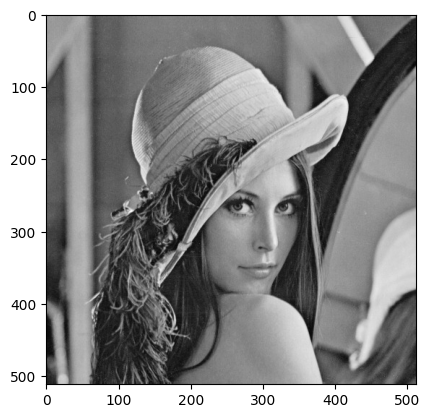

In [6]:
show_img(lena_gray)

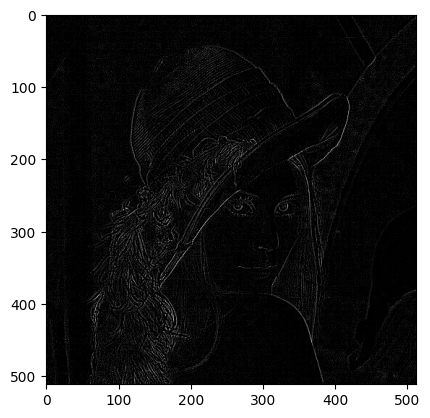

In [7]:
lena_gray_k1 = cv.filter2D(lena_gray, -1, kernel1)
show_img(lena_gray_k1)

In [8]:
kernel2 = kernel1 * -1

In [9]:
kernel3 = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
        ], dtype=np.int16)

In [10]:
kernel4 = kernel3 * -1

In [11]:
kernel4.sum()

np.int64(0)

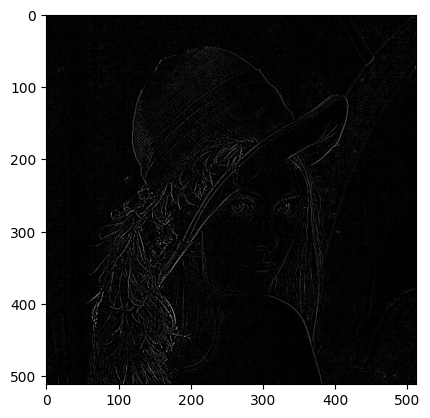

In [12]:
lena_gray_k2 = cv.filter2D(lena_gray, -1, kernel2)
show_img(lena_gray_k2)

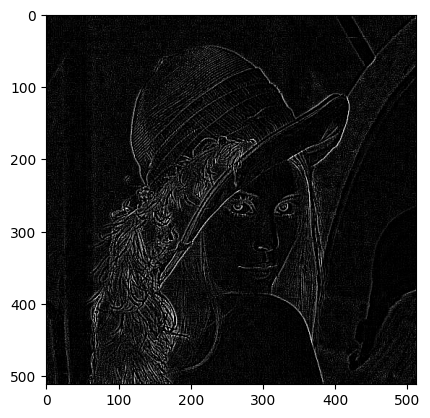

In [13]:
lena_gray_k3 = cv.filter2D(lena_gray, -1, kernel3)
show_img(lena_gray_k3)

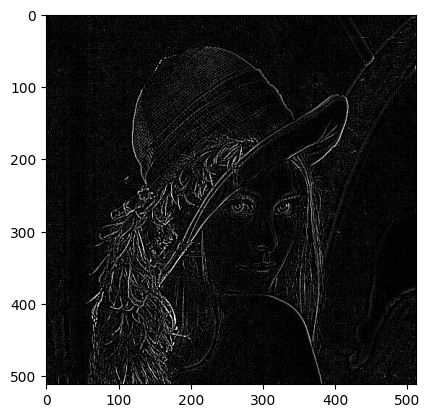

In [14]:
lena_gray_k4 = cv.filter2D(lena_gray, -1, kernel4)
show_img(lena_gray_k4)

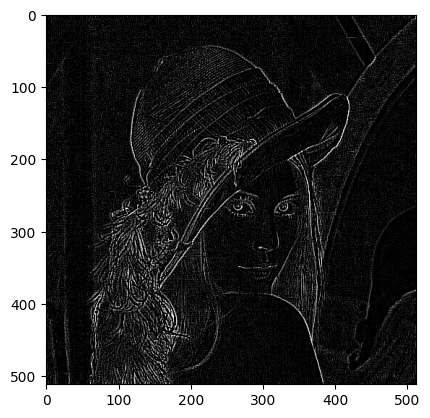

In [15]:
show_img(cv.Laplacian(lena_gray, -1, ksize=3))

---
## Filtro de mediana

In [16]:
img_noise = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/s&p-noise.jpeg", 0)

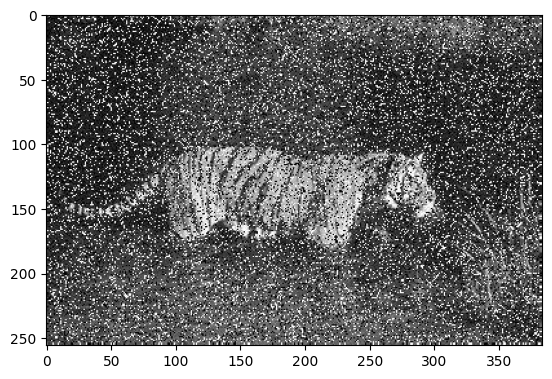

In [17]:
show_img(img_noise)

Sal = 255

Pimienta = 0

[44, 120, 77

0, 255, 255

0, 0, 99]

[44, 120, 77, 0, 255, 255, 0, 0, 99]

[0, 0, 0, 44, 77, 99, 120, 255, 255]

mediana = 77

In [27]:
matriz = np.array([[44, 120, 77],
                    [0, 255, 255],
                    [0, 0, 99]])

In [20]:
matriz.shape

(3, 3)

In [28]:
matriz_aplanda = matriz.flatten()

In [29]:
matriz_aplanda.sort() # In-Place

In [30]:
matriz_aplanda

array([  0,   0,   0,  44,  77,  99, 120, 255, 255])

In [36]:
matriz_aplanda[matriz_aplanda.shape[0] // 2].item() # Omite la parte decimal

77

In [37]:
matriz_aplanda.sum()

np.int64(850)

In [38]:
matriz_aplanda.mean()

np.float64(94.44444444444444)

In [39]:
matriz_aplanda.std()

np.float64(95.35793518354483)

In [ ]:
# matriz_aplanda.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [42]:
np.median(matriz_aplanda).item()

77.0

---
## Filtro de mediana

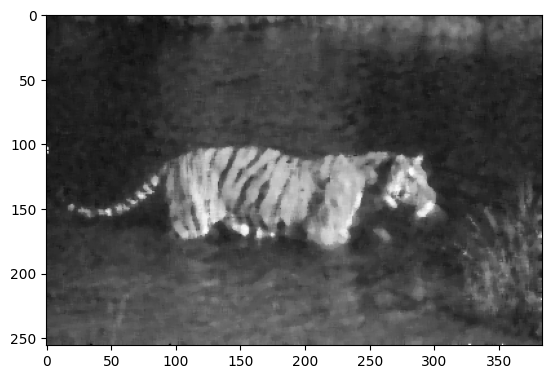

In [48]:
show_img(cv.medianBlur(img_noise, 5))

---
## Breviario cultural 
Función techo y piso

Techo: $\lceil x \rceil $

Piso: $\lfloor x \rfloor$

In [ ]:
# Redondeo
calif = 9.49999
round(calif)

9

In [ ]:
# Piso
np.floor(9.99999999) # Ir al entero inmediato ANTERIOR

np.float64(9.0)

In [58]:
# Techo
np.ceil(9.30) # Ir al entero inmediato SIGUIENTE

np.float64(10.0)

---
## Desenfoque Gaussiano

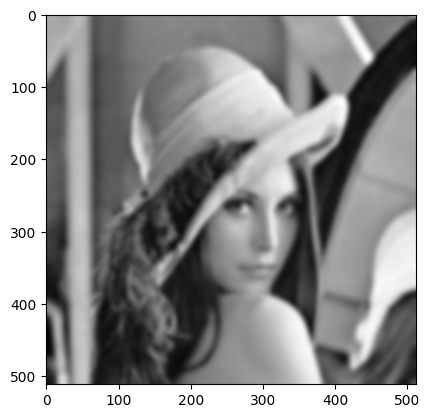

In [75]:
show_img(cv.GaussianBlur(lena_gray, (21, 21), sigmaX=0))

In [99]:
A = cv.getGaussianKernel(7, sigma=0)
B = cv.getGaussianKernel(7, sigma=0)

In [100]:
B.T

array([[0.03125 , 0.109375, 0.21875 , 0.28125 , 0.21875 , 0.109375,
        0.03125 ]])

In [101]:
A.shape, B.T.shape
# Matriz fila: 1 fila varias columnas
# Matriz columna: 1 columna varias filas

((7, 1), (1, 7))

In [102]:
kernel_gaussiano = A @ B.T

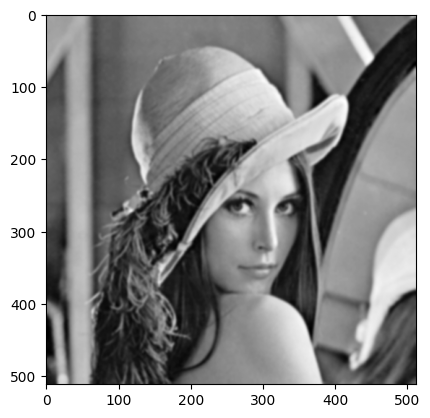

In [103]:
show_img(cv.filter2D(lena_gray, -1, kernel_gaussiano))